In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

In [2]:
df = pd.read_csv('community_intro_data.csv')
df['season'] = df.episode_code // 100
df.head(5)

,overal_episode,season_episode,episode_name,airing_date,episode_code,has_line,is_correct,note,season
0,1,1,"""Pilot""","September 17, 2009",100,False,NaN,no intro,1
1,2,2,"""Spanish 101""","September 24, 2009",101,True,False,NaN,1
2,3,3,"""Introduction to Film""","October 1, 2009",102,True,False,NaN,1
3,4,4,"""Social Psychology""","October 8, 2009",104,False,NaN,super shortend,1
4,5,5,"""Advanced Criminal Law""","October 15, 2009",105,False,NaN,shortend,1


The show Community has a total of 110 episodes in 6 seasons.
However, one episode is not on Netflix


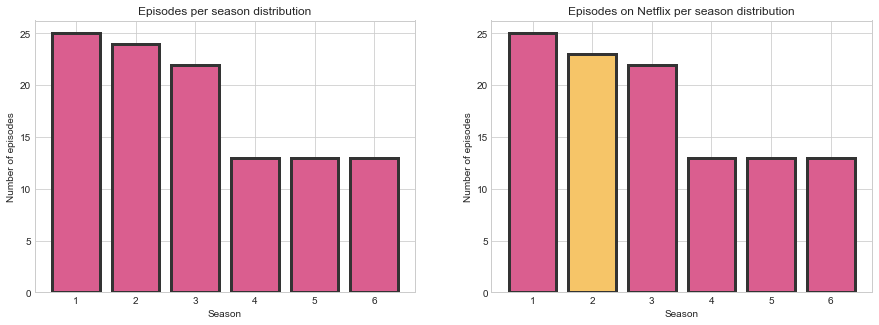

In [5]:
nr_episodes = len(df)
nr_seasons = max(df.season)
print('The show Community has a total of {} episodes in {} seasons.'.format(nr_episodes, nr_seasons))
print('However, one episode is not on Netflix')

# Defining style and figure
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
plt.style.use('seaborn-whitegrid') # Selecting whitegrid style


# Building a barchart with custom colors
ax1.bar(df.season.unique(), df.season.value_counts(), color = '#DA5E8F', edgecolor = '#333333', linewidth = 3)

# Adding title and labels
ax1.set_title('Episodes per season distribution')
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of episodes')

# Making dataframe with all episodes that aired on Netflix
df_netflix = df[df.note != 'not on netflix']

# Building a barchart with custom colors
barlist = ax2.bar(df_netflix.season.unique(), df_netflix.season.value_counts(), color = '#DA5E8F', edgecolor = '#333333', linewidth = 3)
barlist[1].set_color('#F6C568')
barlist[1].set_edgecolor('#333333')
barlist[1].set_linewidth(3)

# Adding title and labels
ax2.set_title('Episodes on Netflix per season distribution')
ax2.set_xlabel('Season')
ax2.set_ylabel('Number of episodes')

plt.show()

In most episodes of Community the full length intro song plays somewhere in the first few minutes of the show. This is not always the case. Some episodes have a shortend version and others a completely different version. Of the 109 episodes on Netflix, 74 featured the full length intro song.


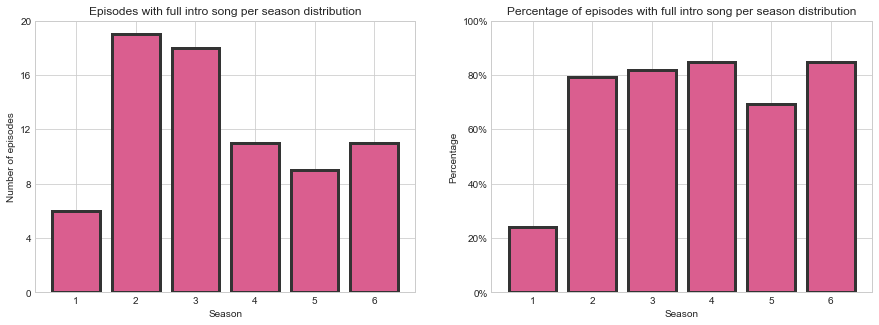

In [6]:
df_full_length = df[df.has_line]

print('In most episodes of Community the full length intro song plays somewhere in the first few minutes of the show. '
      'This is not always the case. Some episodes have a shortend version and others a completely different version. '
      'Of the {} episodes on Netflix, {} featured the full length intro song.'.format(len(df_netflix), len(df_full_length)))

f, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
plt.style.use('seaborn-whitegrid') # Selecting whitegrid style

ax1.bar(df_full_length.season.unique(), df_full_length.season.value_counts().sort_index(), color = '#DA5E8F', edgecolor = '#333333', linewidth = 3)
ax1.set_yticks(range(0, 21, 4))

ax1.set_title('Episodes with full intro song per season distribution')
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of episodes')

eps_per_season = df.season.value_counts()
intro_eps_per_season = df_full_length.season.value_counts().sort_index()

perc_intro_per_season = intro_eps_per_season / eps_per_season * 100

ax2.bar(df_full_length.season.unique(), perc_intro_per_season, color = '#DA5E8F', edgecolor = '#333333', linewidth = 3)
ax2.set_yticks(range(0,101,20))
ax2.set_yticklabels(['{}%'.format(x) for x in range(0,101,20)])

ax2.set_title('Percentage of episodes with full intro song per season distribution')
ax2.set_xlabel('Season')
ax2.set_ylabel('Percentage')

plt.show()

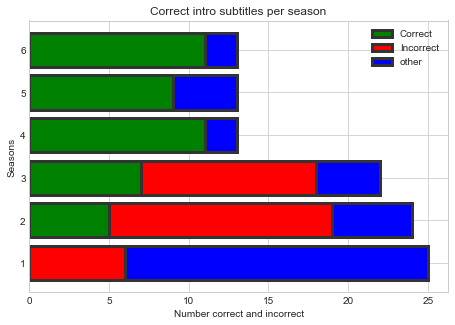

In [7]:
name = df.season.unique()
correct = df[df.is_correct.fillna(False)].season.value_counts().reindex(df.season.unique(), fill_value=0)
not_correct = df[~df.is_correct.fillna(False)].season.value_counts().reindex(df.season.unique(), fill_value=0)
incorrect = df[df.is_correct == False].season.value_counts().reindex(df.season.unique(), fill_value=0)
other = df[df.is_correct.isna()].season.value_counts().reindex(df.season.unique(), fill_value=0)

fig = plt.figure(figsize=(7.5,5))

b1 = plt.barh(name, correct, color="green", edgecolor = '#333333', linewidth = 3)
b2 = plt.barh(name, incorrect, left=correct, color="red", edgecolor = '#333333', linewidth = 3)
b3 = plt.barh(name, other, left=incorrect+correct, color="blue", edgecolor = '#333333', linewidth = 3)

plt.title("Correct intro subtitles per season")
plt.ylabel("Seasons")
plt.xlabel("Number correct and incorrect")
plt.legend([b1, b2, b3], ["Correct", "Incorrect", "other"], loc="upper right")

plt.show()

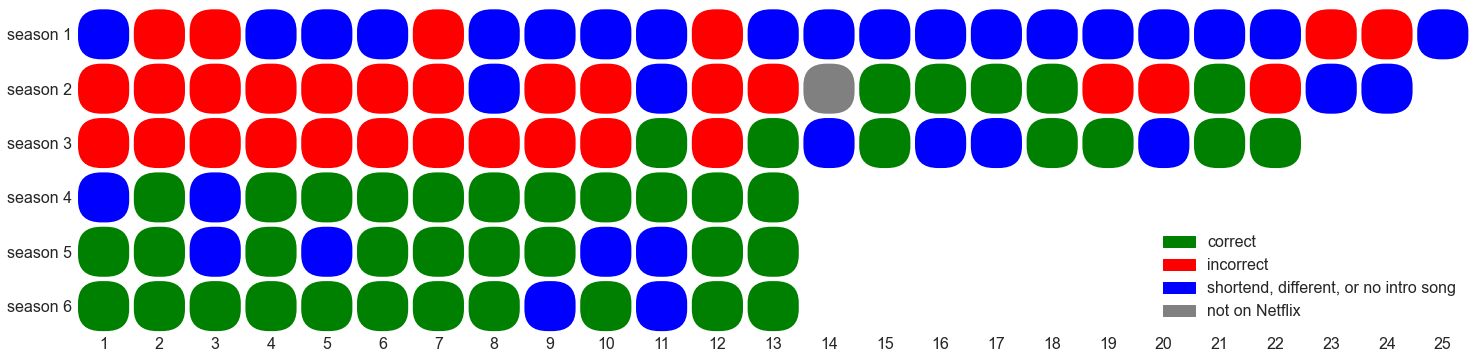

In [20]:
color = ['blue' if pd.isna(x) else 'green' if x else 'red' for x in df.is_correct]
color = [c if note != 'not on netflix' else 'grey' for note, c in zip(df.note, color)]
visual_df = pd.concat([df.season, pd.DataFrame([1]*len(df)), df.season_episode, pd.DataFrame(color)], axis=1)
visual_df.columns = ["season", "ones", "season_episode", "color"]

# pivot the data
plot_df = visual_df.pivot(index='season', columns='season_episode')

# plot by row
fig, ax = plt.subplots(figsize=(25,6))

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = False

ax.grid(False)

green_patch = mpatches.Patch(color='green', label='correct')
red_patch = mpatches.Patch(color='red', label='incorrect')
blue_patch = mpatches.Patch(color='blue', label='shortend, different, or no intro song')
grey_patch = mpatches.Patch(color='grey', label='not on Netflix')
plt.legend(handles=[green_patch, red_patch, blue_patch, grey_patch], prop={'size': 16})

plt.xlim([0, 6])
plt.ylim([0.5, 6.5])

plt.gca().invert_yaxis()

plt.xticks(np.arange(6/50, 6+6/50, step=6/25), range(1,26), fontsize = 16)
plt.yticks(np.arange(1, 7, step=1), ["season "+str(x) for x in range(1,7)], fontsize = 16)

for i in range(1,7):
    rights = plot_df.loc[i,'ones'].dropna().cumsum()/25*6
    lefts = rights.shift(fill_value=0)
    ax.barh(i, plot_df.loc[i,'ones'].dropna()/25*6, left=lefts, color=plot_df.loc[i,'color'].dropna(), height = 1)

new_patches = []
for patch in reversed(ax.patches):
    bb = patch.get_bbox()
    color=patch.get_facecolor()
    p_bbox = FancyBboxPatch((bb.xmin, bb.ymin),
                        abs(bb.width), abs(bb.height),
                        boxstyle="round,pad=-0.01,rounding_size=0.1",
                        ec="none", fc=color,
                        mutation_aspect=4
                        )
    patch.remove()
    new_patches.append(p_bbox)

for patch in new_patches:
    ax.add_patch(patch)

fig.patch.set_facecolor('white')
#plt.savefig('demo.png')
plt.show()